# Support Vector Machines (SVM)

Un algoritmo SVM funciona encontrando el hiperplano que separe mejor dos conjuntos de datos, la funcion matematica para encontrar el limite entre los dos conjuntos se llama kernel

Obtenga la base IRIS del paquete datasets de la librería sklearn, para
realizar un análisis de SVM.
1. Obtenga un resumen estadístico de los datos, además de sus
distribuciones gráficas.
2. Separe la base de train/test en 90/10
3. Ajuste un SVM con los siguientes kernel:
- a. "linear"
- b. "rbf"
- c. "poly"
4. Entregue el gráfico de cada uno de los modelos para los diferentes
kernel.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
# Cargar datos IRIS
iris = load_iris()

# Crear DataFrame con los datos
data_iris = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
data_iris['target'] = iris['target']

# Resumen estadístico de los datos
data_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
data_iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

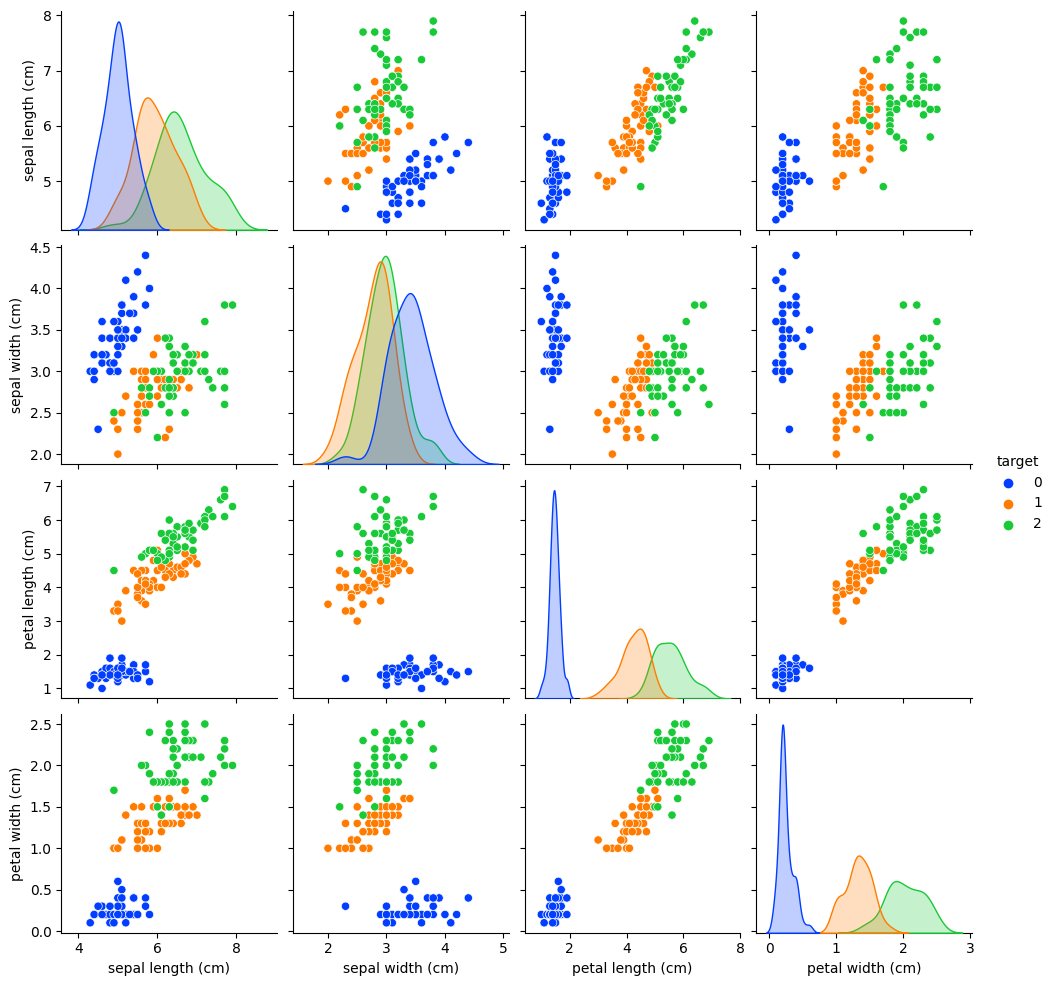

In [ ]:
# Distribución de las características
sns.pairplot(data_iris, hue='target',palette='bright')
plt.show()

en esta figura se puede ver la distribucion de cada caracteristica en particular, en la diagonal, y los sccater plot en su triangulo superior e inferior, si se fijan bien tiene sumetria en la antidiagonal entre los de la triangular superior e inferior, se puede apreciar que los distintos grupos de flores se separan segun sus caracteristicas

In [ ]:
#separamos los datos en set de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(data_iris[iris.feature_names], data_iris['target'], test_size=0.1, random_state=42)

In [ ]:
# Crear instancias de SVM con diferentes kerner lineal
svm_linear = SVC(kernel='linear')

svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Crear instancias de SVM con diferentes kerner rbf
svm_rbf = SVC(kernel='rbf')

svm_rbf.fit(X_train, y_train)

SVC()

In [ ]:
# Crear instancias de SVM con diferentes kerner poly
svm_poly = SVC(kernel='poly')

svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



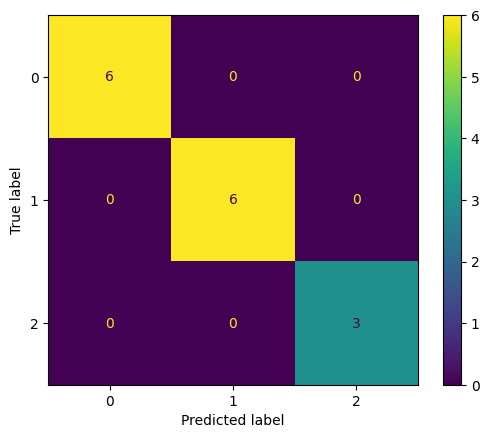

In [ ]:
# Calcular la precisión en los datos de prueba
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)

lineal = confusion_matrix(y_test, y_pred_linear)

ConfusionMatrixDisplay(confusion_matrix=lineal).plot();
print(classification_report(y_test, y_pred_linear))

la tabla y la grafica anterior, nos indican que el modelo del kerner lineal funciona perfecto, con una exactidud de $100\%$ y precision de $100\%$ igual

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



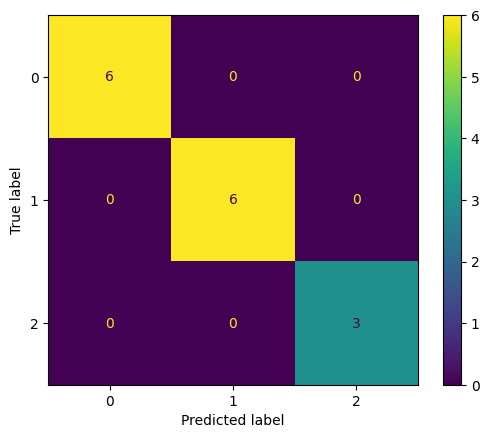

In [ ]:
rbf = confusion_matrix(y_test, y_pred_rbf)

ConfusionMatrixDisplay(confusion_matrix=rbf).plot();
print(classification_report(y_test, y_pred_rbf))

la tabla y la grafica anterior, nos indican que el modelo del kerner rbf funciona perfecto, con una exactidud de $100\%$ y precision de $100\%$ igual

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.83      0.91         6
           2       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.92      0.94      0.92        15
weighted avg       0.95      0.93      0.94        15



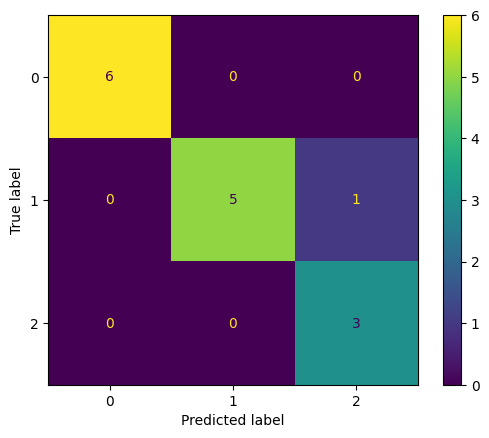

In [ ]:
poly = confusion_matrix(y_test, y_pred_poly)

ConfusionMatrixDisplay(confusion_matrix=poly).plot();
print(classification_report(y_test, y_pred_poly))

el modelo de kernel polinomial es el que funciona pero de los 3, dado que tiene una exactitud de $93\%$ dado que esta falla a identificar una planta de 15

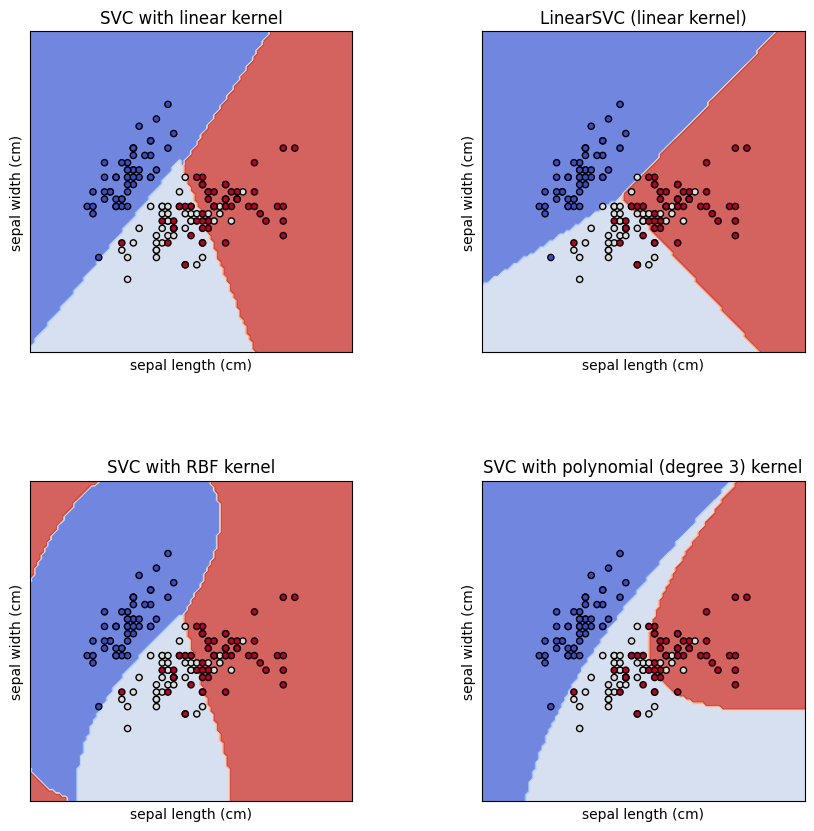

In [ ]:

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

C = 1.0
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

fig, sub = plt.subplots(2, 2,figsize=(10, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()